In [2]:
import pandas as pd
import numpy as np

# 랜덤포레스트 모델로 예측한 국면 지표 예측값 입력
economic = pd.read_excel('data_predict.xlsx')
economic

,Unnamed: 0,date,icon01_x,icon01_y,icon02_x,icon02_y,icon03_x,icon03_y,icon04_x,icon04_y,...,"icon11_nx_[12, 3]","icon11_ny_[12, 3]","icon15_nx_[6, 1]","icon15_ny_[6, 1]","icon15_nx_[6, 3]","icon15_ny_[6, 3]","icon15_nx_[12, 1]","icon15_ny_[12, 1]","icon15_nx_[12, 3]","icon15_ny_[12, 3]"
0,0,2003/02,238.432495,287.590404,277.203594,254.404164,191.940296,253.870564,225.184495,227.591683,...,-1.307789,0.117796,-0.859555,0.502929,-0.859555,0.502929,-0.859555,0.502929,-0.859555,0.502929
1,1,2003/03,238.453195,293.202404,261.305994,255.949764,206.720096,265.116644,250.190095,231.113443,...,-1.124760,0.343638,-0.681506,0.638561,-0.681506,0.638561,-0.681506,0.638561,-0.681506,0.638561
2,2,2003/04,239.840095,298.564164,262.009794,257.370244,228.703495,272.458244,265.052694,231.992963,...,-0.776134,0.498501,-0.432487,0.723710,-0.432487,0.723710,-0.432487,0.723710,-0.432487,0.723710
3,3,2003/05,248.741095,302.343524,276.251394,256.255204,250.583395,275.910084,266.729394,232.574403,...,-0.395135,0.575932,-0.335993,0.789122,-0.335993,0.789122,-0.335993,0.789122,-0.335993,0.789122
4,4,2003/06,263.727894,303.458564,283.599894,253.837444,265.694394,276.675524,265.073394,233.450243,...,-0.011646,0.575426,-0.273738,0.841882,-0.273738,0.841882,-0.273738,0.841882,-0.273738,0.841882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,216,2021/02,298.648794,245.528003,265.259694,292.668804,295.357494,266.945604,322.350293,272.638564,...,2.062184,-1.139479,1.619864,0.351292,1.552442,0.309312,2.085965,0.346156,1.318364,0.426067
217,217,2021/03,282.212994,243.356803,260.850595,294.299044,298.503894,261.881924,329.201993,262.110084,...,2.059320,-1.187026,1.672345,0.029496,1.558668,0.064467,2.006341,0.043363,1.339655,-0.059386
218,218,2021/04,270.248394,243.312643,252.756895,297.364484,293.328894,257.730884,328.850093,251.647844,...,2.180405,-1.594756,1.666991,-0.328789,1.858175,-0.156428,1.801523,-0.272904,1.435777,-0.334837
219,219,2021/05,267.950694,243.676963,250.127995,300.897284,282.005994,255.596484,327.483893,241.428483,...,2.269803,-1.381693,1.623910,-0.702269,1.951744,-0.624281,1.932881,-0.777069,1.616502,-0.635833


In [3]:
# [12, 1] 12개월 데이터로 한 달 후의 데이터 예측값 
economic_use = economic[['icon01_nx_[12, 1]','icon01_ny_[12, 1]','icon02_nx_[12, 1]','icon02_ny_[12, 1]',
                         'icon03_nx_[12, 1]','icon03_ny_[12, 1]','icon04_nx_[12, 1]','icon04_ny_[12, 1]',
                         'icon05_nx_[12, 1]','icon05_ny_[12, 1]','icon06_nx_[12, 1]','icon06_ny_[12, 1]',
                         'icon07_nx_[12, 1]','icon07_ny_[12, 1]','icon08_nx_[12, 1]','icon08_ny_[12, 1]',
                         'icon11_nx_[12, 1]','icon11_ny_[12, 1]','icon15_nx_[12, 1]','icon15_ny_[12, 1]']]

print(economic_use.head())

   icon01_nx_[12, 1]  icon01_ny_[12, 1]  icon02_nx_[12, 1]  icon02_ny_[12, 1]  \
0          -0.963520           0.575047           0.202511          -0.565929   
1          -0.962898           0.767993          -0.275606          -0.512790   
2          -0.921187           0.952335          -0.254439          -0.463952   
3          -0.653492           1.082274           0.173873          -0.502289   
4          -0.202768           1.120610           0.394878          -0.585414   

   icon03_nx_[12, 1]  icon03_ny_[12, 1]  icon04_nx_[12, 1]  icon04_ny_[12, 1]  \
0          -2.361761          -0.584275          -1.361951          -1.487769   
1          -1.917263          -0.197624          -0.609913          -1.366687   
2          -1.256117           0.054788          -0.162925          -1.336449   
3          -0.598085           0.173466          -0.112498          -1.316458   
4          -0.143626           0.199782          -0.162302          -1.286346   

   icon05_nx_[12, 1]  icon

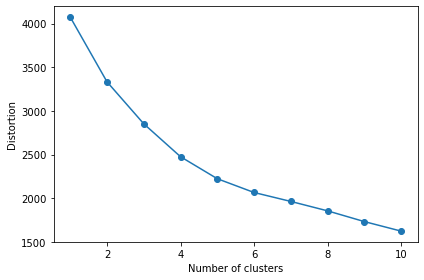

In [4]:
# 엘보우 방법을 사용해서 최적의 클러스터 개수 찾기
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(economic_use)
    distortions.append(km.inertia_)
    
plt.plot(range(1,11), distortions, marker ='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

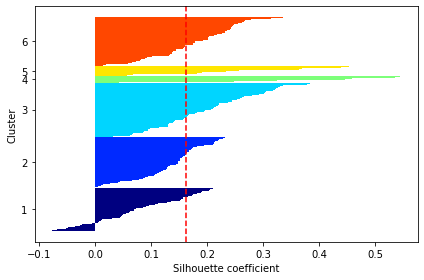

In [5]:
# 실루엣 그래프로 군집 품질을 정량화 
km = KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(economic_use)

from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(economic_use, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.yticks(yticks, cluster_labels +1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

In [8]:
# k-means clustering을 통해 각 경기 국면에 대한 라벨링
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

clusters = 6
kmeans = KMeans(n_clusters = clusters)
kmeans.fit(economic_use)

print(kmeans.labels_)


[4 4 4 4 4 4 5 5 5 5 5 5 5 2 0 0 0 0 0 0 0 0 4 4 4 4 4 4 5 5 5 5 5 5 5 5 0
 0 0 0 0 0 5 5 5 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 3 3 3 3 3 3 1
 1 1 1 1 1 1 5 5 5 5 5 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0
 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 2 2 2 2 2 2 2 2 2 2 2 0
 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 0 3 3 3 3 4 1 1 1 1 5 5 5 5 2 2 2 2]


In [31]:
# 경기 국면 라벨링 데이터 엑셀로 출력
economic_use['cluster_label'] = kmeans.labels_
economic_use['date'] = economic['date']
economic_use.to_excel('economic_clustering_predict[12,1].xlsx')

<ipython-input-31-2423b6e89493>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_use['cluster_label'] = kmeans.labels_
<ipython-input-31-2423b6e89493>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_use['date'] = economic['date']


In [9]:
# PCA module로 데이터 3차원으로 차원 축소
from sklearn.decomposition import PCA
pca = PCA(3)
pca.fit(economic_use)

pca_data = pd.DataFrame(pca.transform(economic_use))

print(pca_data.head())

          0         1         2
0  2.490718 -0.869374  2.153696
1  2.263237 -0.318360  1.717012
2  1.940980  0.320936  1.398092
3  1.431322  0.896271  1.265159
4  0.503097  1.266124  1.035794


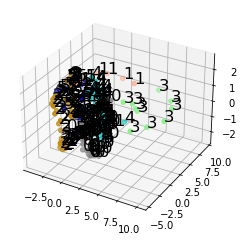

In [11]:
# 클러스터링 결과 그래프로 출력
from matplotlib import colors as mcolors
import math

colors = list(zip(*sorted((
                    tuple(mcolors.rgb_to_hsv(
                            mcolors.to_rgba(color)[:3])), name)
                    for name, color in dict(
                            mcolors.BASE_COLORS, **mcolors.CSS4_COLORS
                                                        ).items())))[1]

skips = math.floor(len(colors[5 : -5])/clusters)
cluster_colors = colors[5 : -5 : skips]

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(pca_data[0], pca_data[1], pca_data[2],
                c = list(map(lambda label : cluster_colors[label],
                                                    kmeans.labels_)))

str_labels = list(map(lambda label:'% s' % label, kmeans.labels_))

list(map(lambda data1, data2, data3, str_label:
                ax.text(data1, data2, data3, s = str_label, size = 16.5,
                zorder = 20, color = 'k'), pca_data[0], pca_data[1], 
                pca_data[2], str_labels))

plt.show()

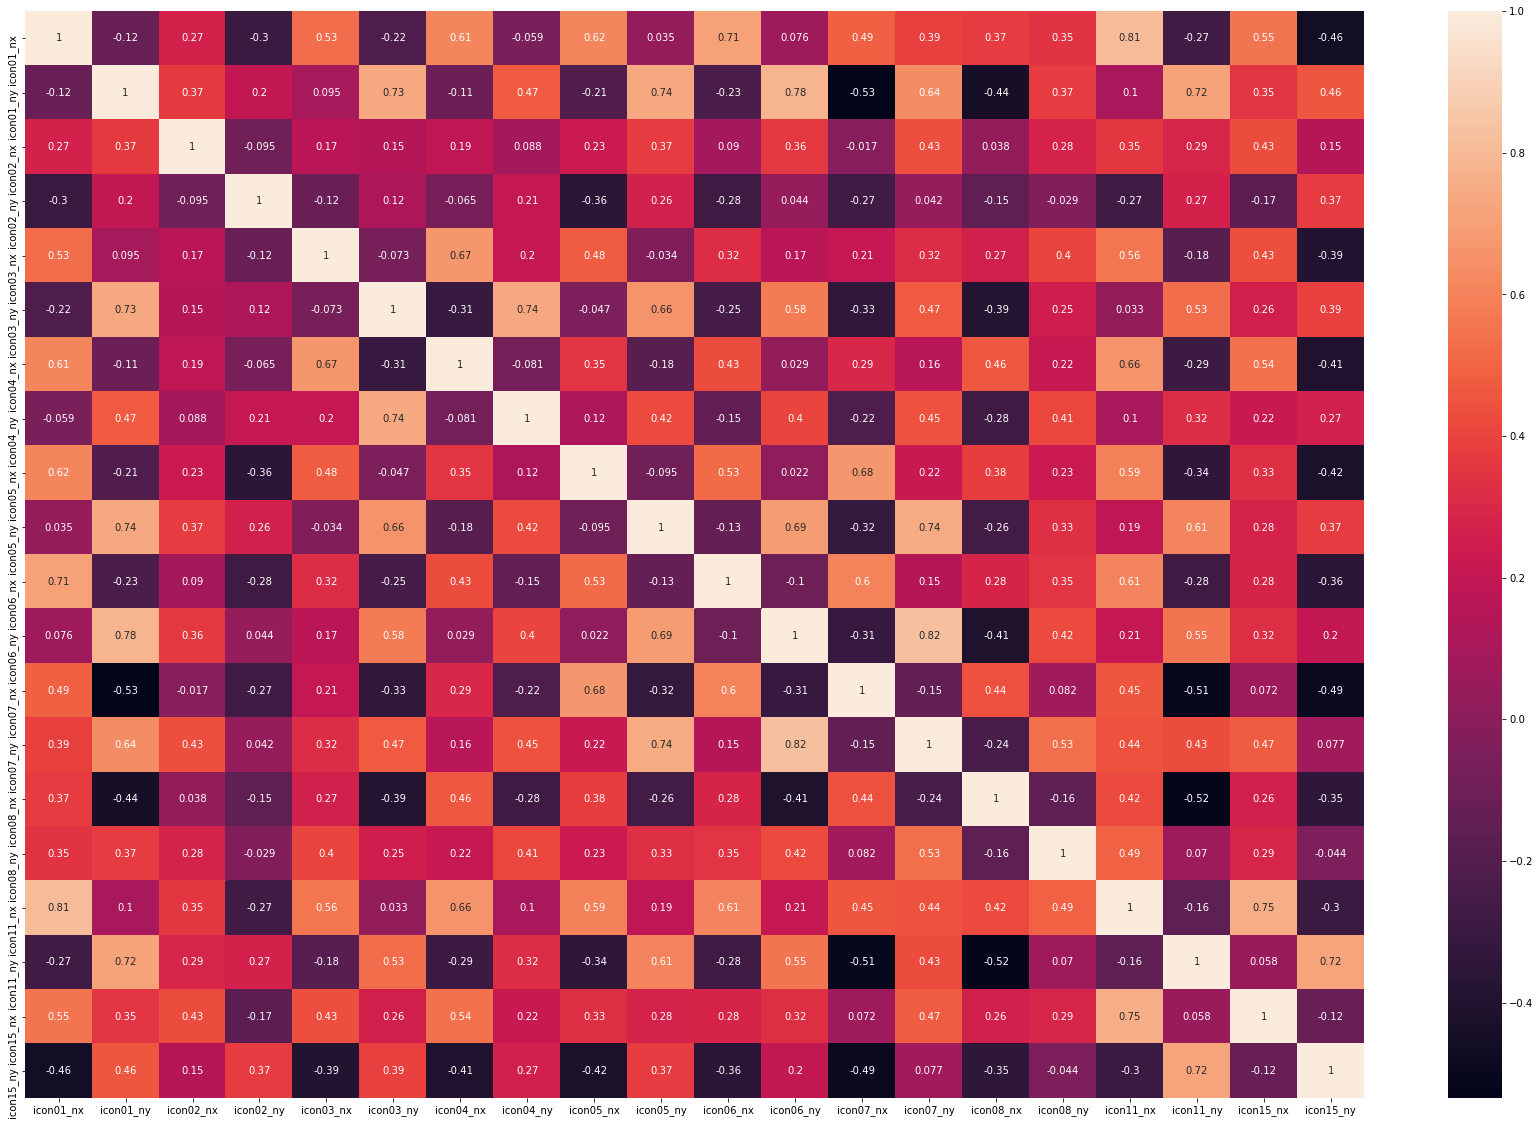

<Figure size 144x216 with 0 Axes>

In [39]:
# 각 국면 데이터 별 상관관계 확인
import seaborn as sns

# generating correlation heat map
sns.heatmap(economic_use.corr(), annot = True)

# posting correlation heatmap to output console
plt.figure(figsize=(2,3))
plt.show()

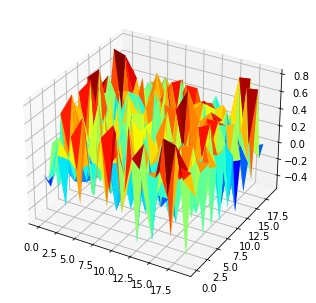

In [20]:
# 각 국면 데이터 별 상관관계 그래프로 출력

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# generating correlation data
df = economic_use.corr()
df.index = range(0, len(df))
df.rename(columns = dict(zip(df.columns, df.index)), inplace = True)
df = df.astype(object)

for i in range(0, len(df)):
    for j in range(0, len(df)):
        if i != j:
            df.iloc[i, j] = (i, j, df.iloc[i, j])
        else:
            df.iloc[i, j] = (i, j, 0)

df_list = []

# flattening dataframe values
for sub_list in df.values:
    df_list.extend(sub_list)
    
# converting list of tuples into trivariate dataframe
plot_df = pd.DataFrame(df_list)

fig = plt.figure()
ax = Axes3D(fig)

# plotting 3D trisurface plot
ax.plot_trisurf(plot_df[0], plot_df[1], plot_df[2], 
                                        cmap = cm.jet, linewidth = 0.2)

plt.show()